In [1]:
from google.colab import files
uploaded = files.upload()


Saving Online Retail.xlsx to Online Retail.xlsx


In [2]:
import pandas as pd

df = pd.read_excel("Online Retail.xlsx")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# Kích thước và thông tin tổng quan
print("Kích thước dữ liệu:", df.shape)
print("\nCác cột có trong dataset:", df.columns.tolist())

# Kiểu dữ liệu và giá trị null
df.info()
print("\nSố lượng giá trị thiếu ở mỗi cột:\n", df.isnull().sum())


Kích thước dữ liệu: (541909, 8)

Các cột có trong dataset: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

Số lượng giá trị thiếu ở mỗi cột:
 InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate       

In [4]:
# Loại bỏ các dòng không có CustomerID hoặc Description
df = df.dropna(subset=["CustomerID", "Description"])

# Loại bỏ trùng lặp
df = df.drop_duplicates()

# Tạo cột doanh thu (TotalPrice)
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

print("Sau khi làm sạch, dữ liệu còn lại:", df.shape)


Sau khi làm sạch, dữ liệu còn lại: (401604, 9)


In [5]:
# Thống kê mô tả các biến số
df.describe()

# Tính thêm mean, median, mode cho các biến chính
import numpy as np
from scipy import stats

print("Mean UnitPrice:", np.mean(df["UnitPrice"]))
print("Median UnitPrice:", np.median(df["UnitPrice"]))
print("Mode UnitPrice:", stats.mode(df["UnitPrice"], keepdims=True)[0][0])



Mean UnitPrice: 3.4740636398043865
Median UnitPrice: 1.95
Mode UnitPrice: 1.25


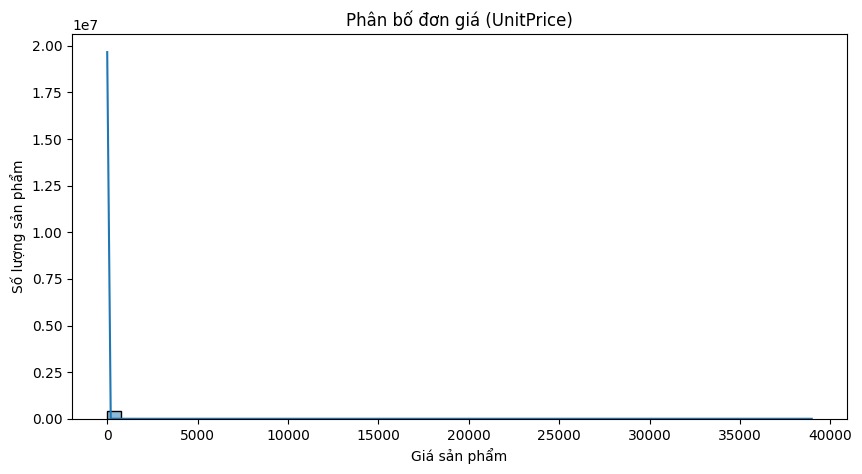

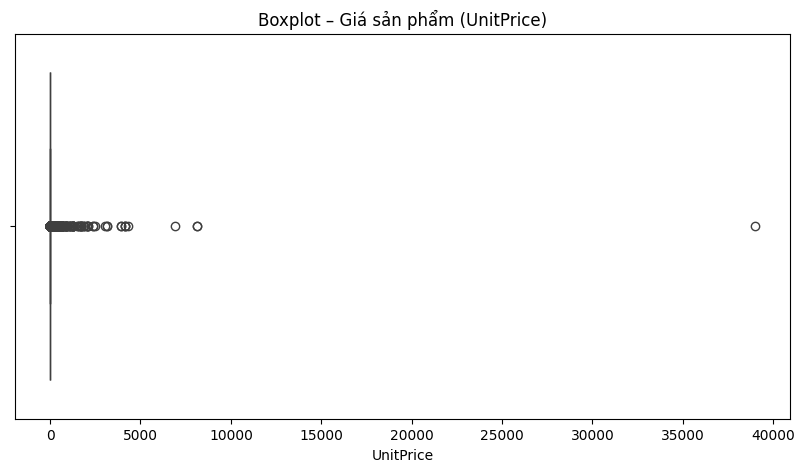

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.histplot(df["UnitPrice"], bins=50, kde=True)
plt.title("Phân bố đơn giá (UnitPrice)")
plt.xlabel("Giá sản phẩm")
plt.ylabel("Số lượng sản phẩm")
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x=df["UnitPrice"])
plt.title("Boxplot – Giá sản phẩm (UnitPrice)")
plt.show()

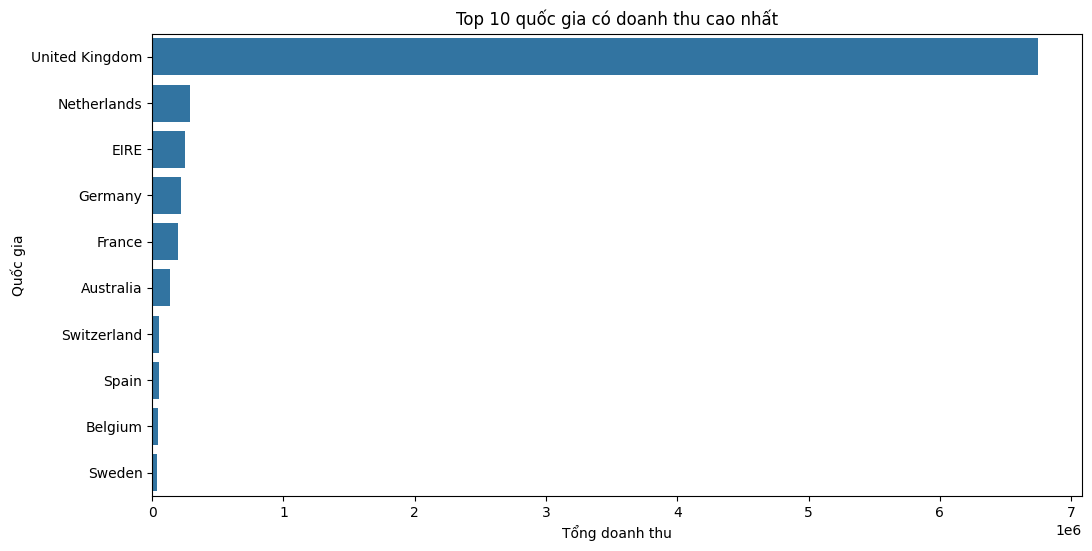

In [8]:
top_country = df.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_country.values, y=top_country.index)
plt.title("Top 10 quốc gia có doanh thu cao nhất")
plt.xlabel("Tổng doanh thu")
plt.ylabel("Quốc gia")
plt.show()

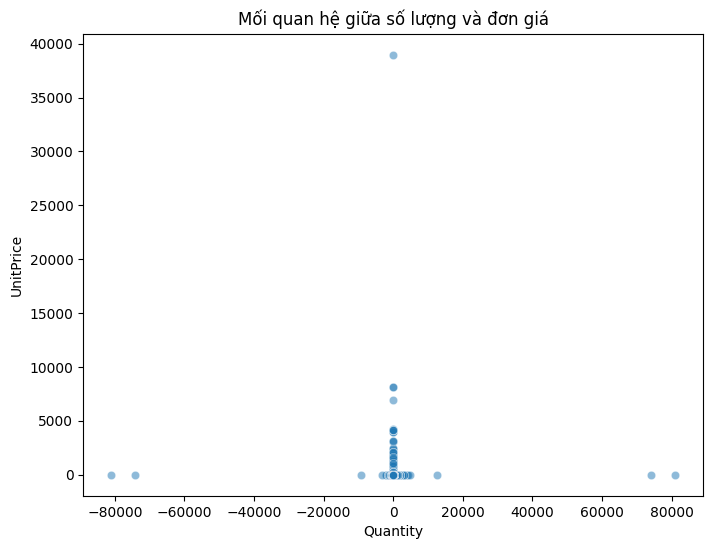

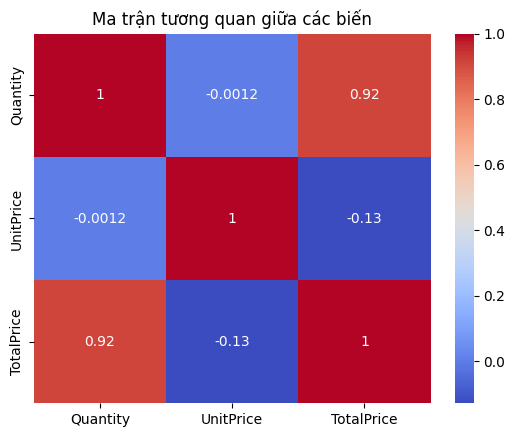

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Quantity", y="UnitPrice", alpha=0.5)
plt.title("Mối quan hệ giữa số lượng và đơn giá")
plt.show()

# Tương quan
corr = df[["Quantity", "UnitPrice", "TotalPrice"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

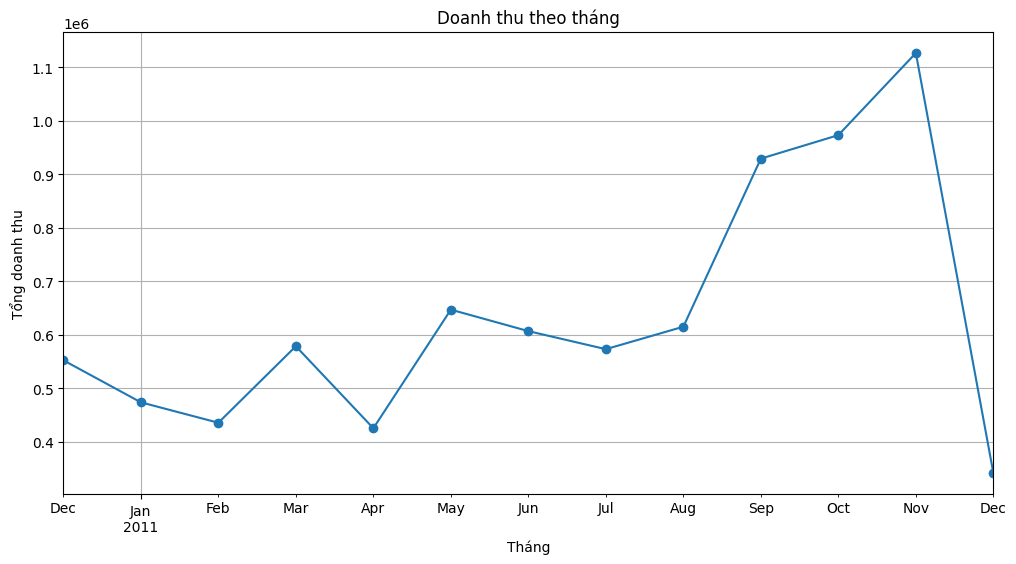

In [10]:
# Chuyển kiểu dữ liệu ngày
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Tạo biến tháng
df["Month"] = df["InvoiceDate"].dt.to_period("M")

# Doanh thu theo tháng
monthly_revenue = df.groupby("Month")["TotalPrice"].sum()

plt.figure(figsize=(12,6))
monthly_revenue.plot(kind="line", marker="o")
plt.title("Doanh thu theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Tổng doanh thu")
plt.grid(True)
plt.show()
